In [0]:
from gensim.models import Word2Vec

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
sentences = []

for i in range(100000):
  start = np.random.randint(0, 20)
  finish = start + np.random.randint(1, 10)
  sentence = [ str(x) for x in range(start, finish)]

  sentences.append(sentence)

In [0]:
# zaczynamy trenowanie modelu - Model Word2Vec

In [0]:
model = Word2Vec(sentences, size=10, window=5, min_count=1)

In [5]:
model.wv['1']

array([-1.348754  ,  1.0148953 , -0.37938324,  1.1428719 , -0.41833037,
        0.54123557, -6.094762  , -2.5451446 , -0.27361518,  3.5447454 ],
      dtype=float32)

In [0]:
def plot_heatmap(model):
  plt.figure(figsize=(15, 8))
  sns.heatmap( model.wv[ model.wv.vocab ], linewidths=0.5 );

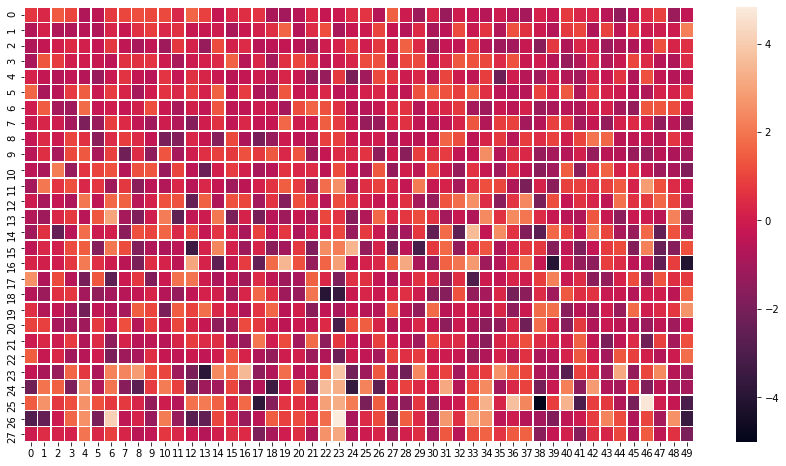

In [22]:
plot_heatmap(Word2Vec(sentences, size=50, window=10))

In [0]:
# PCA

In [0]:
def plot_pca(model):
  X = model.wv[model.wv.vocab]
  pca_model = PCA(n_components=2)
  result = pca_model.fit_transform(X)


  plt.figure(figsize=(8,5))
  plt.scatter(result[:,0], result[:,1]);

  words = list(model.wv.vocab)
  for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [13]:
result[:,0]

array([-4.0451818 , -3.5760674 , -2.7715225 , -1.4348755 , -1.740142  ,
       -1.4742808 , -1.0632337 , -0.59996307,  0.03244299,  0.43584397,
        1.0492512 ,  1.3869365 ,  2.3671186 ,  3.0546582 ,  3.6543067 ,
        4.430838  ,  4.5238624 , -8.004879  , -7.334442  , -6.429995  ,
       -5.9443817 , -5.851617  , -4.7445326 ,  6.318406  ,  7.1095533 ,
        7.861248  ,  8.061322  ,  4.7293196 ], dtype=float32)

In [14]:
result[:,1]

array([-0.4427428 , -1.307329  ,  1.6531343 , -0.6966274 ,  0.20790443,
        0.3780374 ,  0.21646373,  0.17705084,  0.253548  ,  0.42203277,
       -0.06753097,  0.7591209 ,  0.19549051, -1.1809964 ,  3.2984746 ,
        0.53009605, -2.8200648 , -3.0623953 ,  3.1973221 , -1.2897924 ,
       -0.5515598 , -0.07755162,  1.443476  , -1.7329317 ,  6.5295324 ,
       -5.3048716 ,  0.6381773 , -1.3654664 ], dtype=float32)

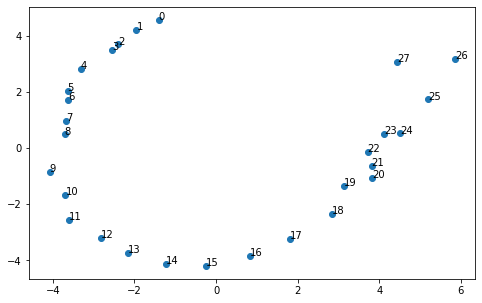

In [36]:
plot_pca(Word2Vec(sentences, size=50, window=10))

In [0]:
# Podobne słowa

In [0]:
model = Word2Vec(sentences, size=300, window=5)

In [39]:
model.wv.most_similar('10', topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('8', 0.357060968875885),
 ('12', 0.34914833307266235),
 ('7', 0.3345731198787689)]

In [42]:
model.wv.most_similar(positive=['10', '8'], negative=['6'], topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('13', 0.3592187166213989),
 ('12', 0.333168625831604),
 ('11', 0.2722742259502411)]